In [22]:
# !pip install seaborn
# !pip install statsmodels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### About the dataset

The dataset, 'Brazilian E-Commerce Public Dataset', is obtained from kaggle.  
It is a publicly available dataset from Brazil's e-commerce sector, encompassing information on 100,000 orders that spans between 2016 and 2018, originating from multiple marketplaces situated within Brazil.

Link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [2]:
df = pd.read_csv('feature_matrix2.csv')

### Insights 1: Demographics of Sellers and Customers (Top 5 States)

In [13]:
# Count the number of sellers in each state
seller_count = df['seller_en.seller_state'].value_counts()

top5_seller_count = seller_count.head(5)
# top5_seller_count


# Sum the counts of states that are not in the top 5
others_count = seller_count[~seller_count.index.isin(top5_seller_count.index)].sum()

# Create a dictionary to represent the top 5 states and 'others'
seller_counts_dict = top5_seller_count.to_dict()
seller_counts_dict['others'] = others_count

# Convert the dictionary to a Series
seller_counts_series = pd.Series(seller_counts_dict)

# Now, seller_counts_series contains counts for the top 5 states and 'others'
print(seller_counts_series)

SP        68405
MG         7648
PR         7426
RJ         4188
SC         3550
others     5243
dtype: int64


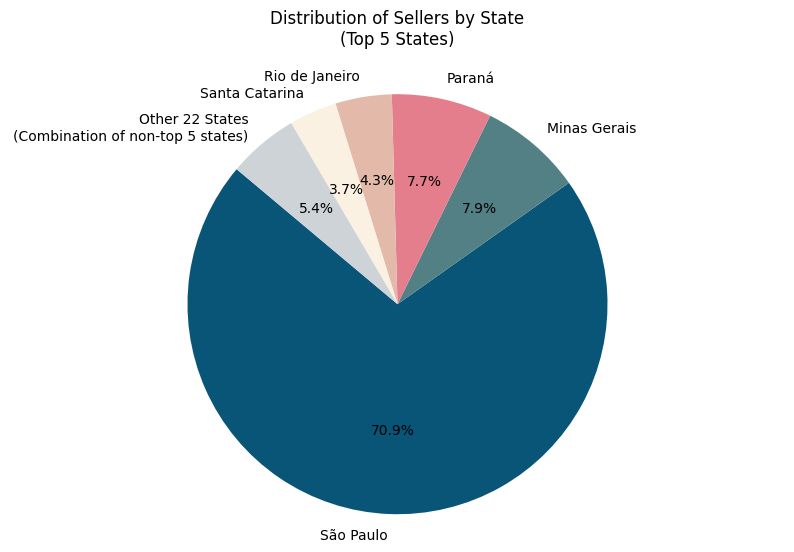

In [21]:
label = ['São Paulo', 'Minas Gerais', 'Paraná', 'Rio de Janeiro', 'Santa Catarina', 'Other 22 States\n(Combination of non-top 5 states)']

# Define the colors for the pie chart
# link to color pallete: https://colorkit.co/palette/085578-538085-faf1e2-e3baaa-e47e8c-ffaa6a/
colors = ['#085578', '#538085', '#e47e8c', '#e3baaa', '#faf1e2', '#ced3d7']

# Create a pie chart
plt.figure(figsize=(10, 6))
# plt.pie(seller_counts_series, labels=seller_counts_series.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.pie(seller_counts_series, labels=label, autopct='%1.1f%%', startangle=140, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of Sellers by State\n(Top 5 States)\n')


# # Create a custom legend
# # The legend function expects a list of legend handles and labels
# # We create "dummy" handles (empty rectangles) and assign them the corresponding labels
# handles = [plt.Rectangle((0,0), 1, 1, fc=color) for color in colors]
# plt.legend(handles, label, loc='upper right')

# Show the pie chart
plt.show()


In [23]:
# Count the number of customers in each state
customer_counts = df['customer_en.customer_state'].value_counts()
top5_customer_counts = customer_counts.head(5)

# Sum the counts of customer that are not in the top 5
others_count = customer_counts[~customer_counts.index.isin(top5_customer_counts.index)].sum()

# Create a dictionary to represent the top 5 customer and 'others'
customer_counts_dict = top5_customer_counts.to_dict()
customer_counts_dict['others'] = others_count

# Convert the dictionary to a Series
customer_counts_series = pd.Series(customer_counts_dict)

# Now, customer_counts_series contains counts for the top 5 states and 'others'
print(customer_counts_series)

SP        40488
RJ        12351
MG        11352
RS         5342
PR         4923
others    22004
dtype: int64


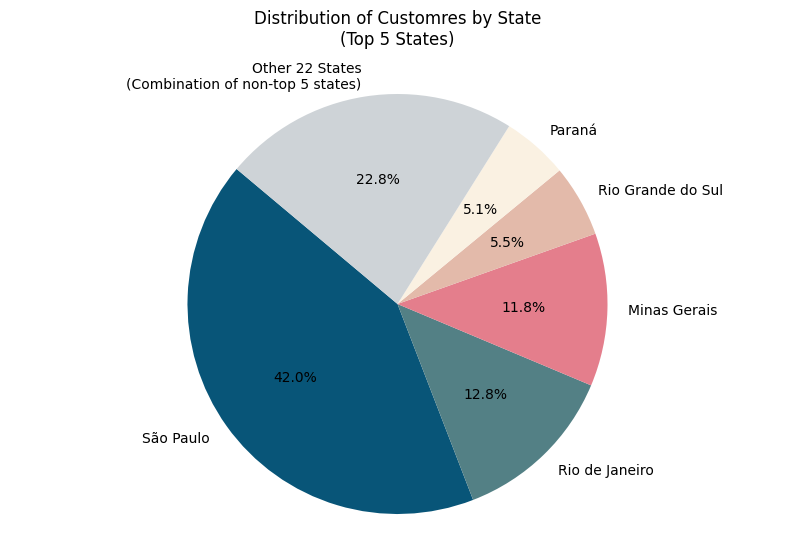

In [24]:
label = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais','Rio Grande do Sul', 'Paraná', 'Other 22 States\n(Combination of non-top 5 states)']

colors = ['#085578', '#538085', '#e47e8c', '#e3baaa', '#faf1e2', '#ced3d7']

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(customer_counts_series, labels=label, autopct='%1.1f%%', startangle=140, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of Customres by State\n(Top 5 States)\n')

# Show the pie chart
plt.show()

### Insight 2: Order Trends Over Time

We can analyze the trends in order counts over time to identify patterns.

Conclusion: Monthly order increases over time, from 2016 to 2018.

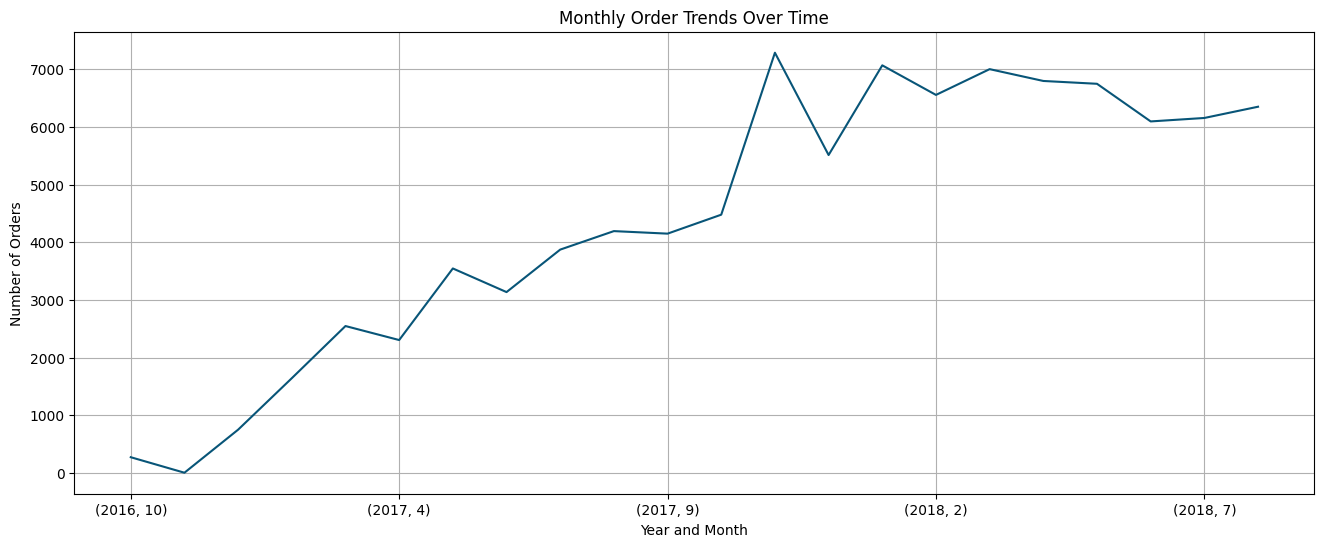

In [48]:
# Group data by month and year, then count orders
monthly_order_counts = df.groupby(['YEAR(order_purchase_timestamp)', 'MONTH(order_purchase_timestamp)']).size()

# Plot the order trends over time
plt.figure(figsize=(16, 6))
monthly_order_counts.plot(legend=False, color='#085578')
plt.title('Monthly Order Trends Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


In [21]:
# monthly_order_counts

### Insights 3: Busiest month of each year

Conclusion: Oct - Jan is the busiest month  

Possibly due to seasonal trends.  
Sales can often be influenced by seasonal factors. For example, in October 2016, there might have been a seasonal increase in sales due to the approaching holiday season, leading to higher consumer spending. In November 2017, the sales might have been boosted by Black Friday sales, which are known for their high discounts and increased shopping activity. In January 2018, post-holiday clearance sales and New Year promotions might have contributed to increased sales.

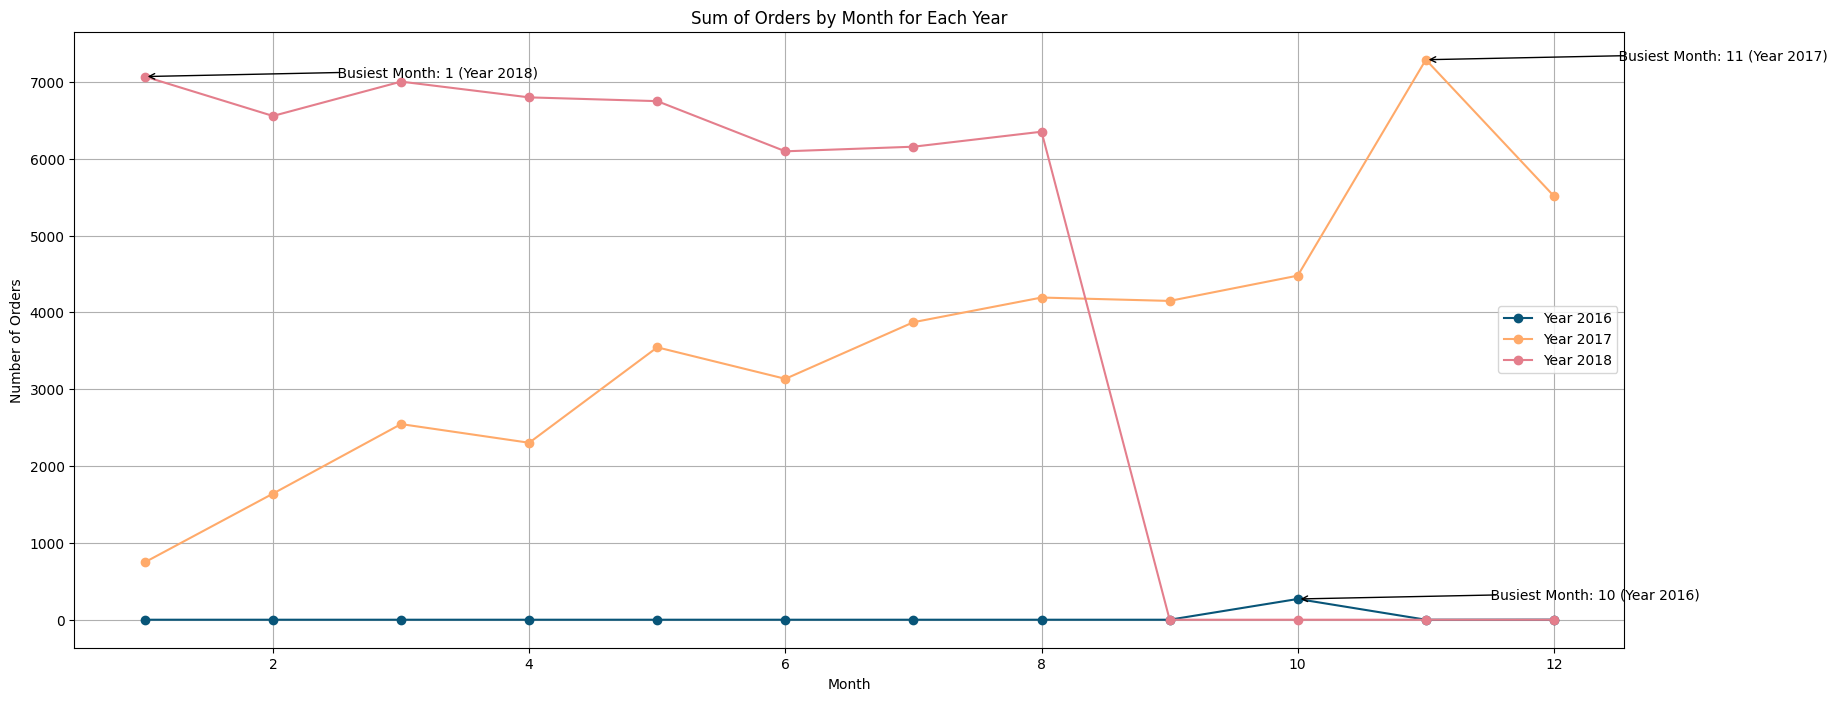

In [69]:
# Group data by year and count the number of orders in each month
yearly_month_counts = df.groupby('YEAR(order_purchase_timestamp)')['MONTH(order_purchase_timestamp)'].value_counts().unstack(fill_value=0)

colors = ['#085578', '#ffaa6a', '#e47e8c']

i=0
# Create a line plot with a line for each year
plt.figure(figsize=(20, 8))
for year in yearly_month_counts.index:
    if year in yearly_month_counts.index:
        plt.plot(yearly_month_counts.columns, yearly_month_counts.loc[year], label=f'Year {year}', marker='o', color=colors[i])
        i = i+1

plt.title('Sum of Orders by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.legend(loc='center right')

# Annotate the busiest month for each year
for year in yearly_month_counts.index:
    busiest_month = yearly_month_counts.loc[year].idxmax()
    plt.annotate(f'                                            Busiest Month: {busiest_month} (Year {year})', 
                 xy=(busiest_month, yearly_month_counts.loc[year, busiest_month]),
                 xytext=(busiest_month, yearly_month_counts.loc[year, busiest_month] + 1), 
                 arrowprops=dict(arrowstyle='->'))

# Display the chart
plt.show()

### Insight 4: Payment Method Analysis

We can explore the distribution of payment methods used by customers.

Conclusion: Credit card is the most popular payment option.

In [36]:
# Count the occurrences of each payment type
payment_type_counts = df['order_payments_en.payment_type'].value_counts()

payment_type_counts

order_payments_en.payment_type
credit_card    73218
boleto         19177
voucher         2582
debit_card      1483
Name: count, dtype: int64

C:\Users\Janice\AppData\Local\Temp\ipykernel_680\3700790858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette=color)


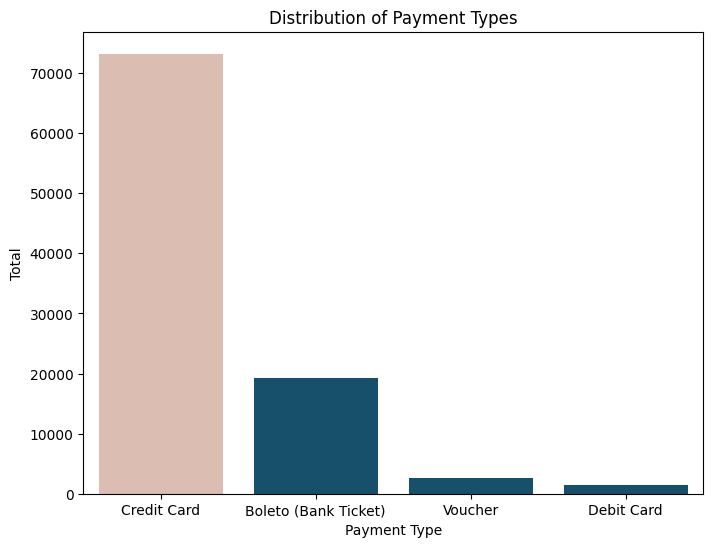

In [38]:
# Specify the color for the most popular payment type
color = ["#e3baaa" if x == 'credit_card' else "#085578" for x in payment_type_counts.index]

# Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette=color)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Total')

# Customize x-axis label points
label = ['Credit Card', 'Boleto (Bank Ticket)', 'Voucher', 'Debit Card']
plt.xticks(range(len(payment_type_counts.index)), label, rotation=0)

plt.show()

### Insights 5: Number of orders per product

Conclusion: Most people buy only 1 product per order

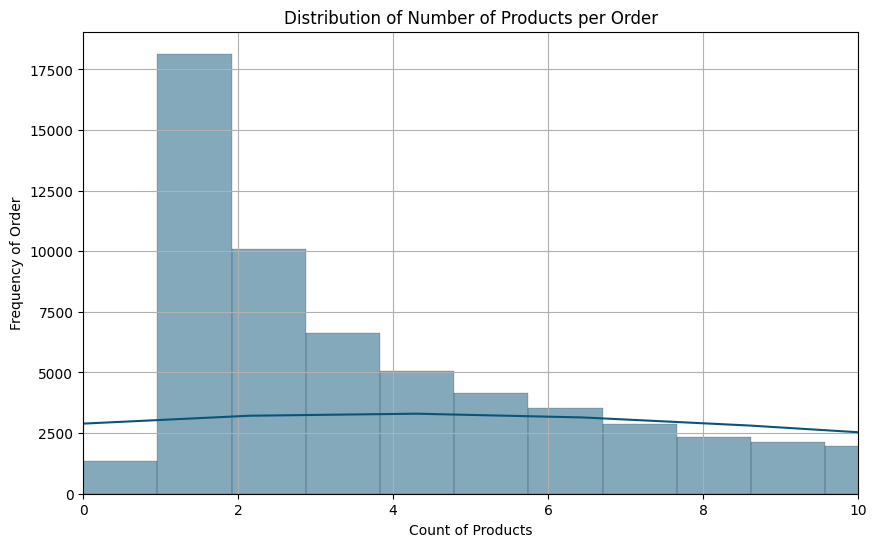

In [75]:
# Plot a histogram of the count of order items
plt.figure(figsize=(10, 6))

sns.histplot(df['products_en.COUNT(orders_en)'], kde=True, color='#085578')
# Set the x-axis limits
plt.xlim(0, 10)
plt.title('Distribution of Number of Products per Order')
plt.xlabel('Count of Products')
plt.ylabel('Frequency of Order')
plt.grid(True)
plt.show()

### Insights 6: Which states is the big spender?

Use:
- customer_en.customer_state
- customer_en.SUM(orders_en.price)

group by state  
cummulative spending per state 

Conclusion: SP state is the biggest spender.

In [93]:
# Group the data by state and calculate cumulative spending per state
state_spending = df.groupby('customer_en.customer_state')['customer_en.SUM(orders_en.price)'].sum().reset_index()

# Sort the data by cumulative spending in descending order
state_spending = state_spending.sort_values(by='customer_en.SUM(orders_en.price)', ascending=False)

# Simplify the amount into in million
state_spending['customer_en.SUM(orders_en.price)'] = state_spending['customer_en.SUM(orders_en.price)'] / 1000000

top5_state = state_spending.head(5)

top5_state

,customer_en.customer_state,customer_en.SUM(orders_en.price)
25,SP,4.620560
18,RJ,1.600312
10,MG,1.426604
22,RS,0.665183
17,PR,0.605069


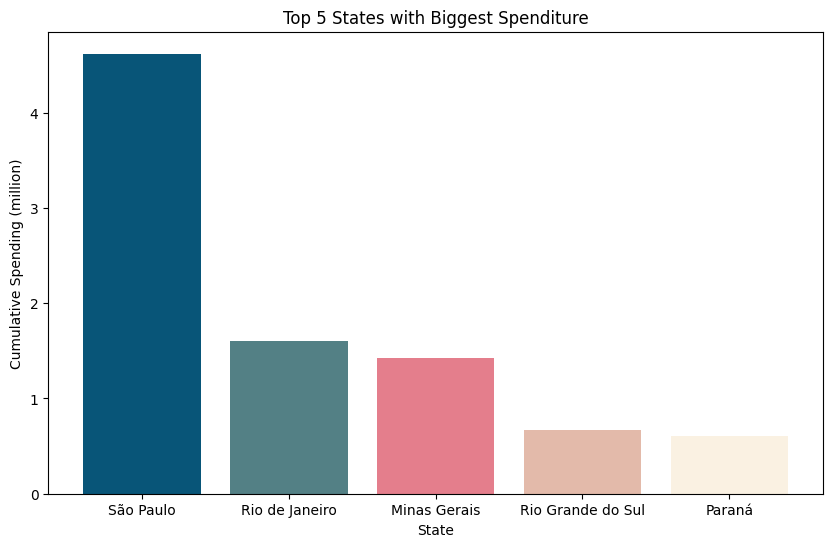

In [92]:
label = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Rio Grande do Sul', 'Paraná']

colors = ['#085578', '#538085', '#e47e8c', '#e3baaa', '#faf1e2']

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))

plt.bar(top5_state['customer_en.customer_state'], top5_state['customer_en.SUM(orders_en.price)'], color=colors)
# plt.bar(label, top5_state['customer_en.SUM(orders_en.price)'])

plt.xticks(top5_state['customer_en.customer_state'], label, rotation=0)
plt.xlabel('State')
plt.ylabel('Cumulative Spending (million)')
plt.title('Top 5 States with Biggest Spenditure')

plt.show()